In [16]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import random

In [19]:
# Load MNIST database of number images
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
how_many_images = len(x_train)
print('Loaded ' + str(how_many_images) + ' images.')
print('Test set of ' + str(len(x_test)) + ' images.') 

Loaded 60000 images.
Test set of 10000 images.


This image should be a(n) 0


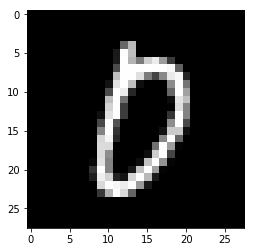

In [29]:
# Plot one random image
import matplotlib.pyplot as plt
rnd_image_index = random.randrange(0, how_many_images-1)
plt.imshow(x_train[rnd_image_index], cmap="gray")
print('This image should be a(n) ' + str(y_train[rnd_image_index]))

In [23]:
# Build predictive model

# 1. Normalize input from 0 to 1 instead of 0 to 255
x_train, x_test = x_train / 255.0, x_test / 255.0

In [26]:
# 2. Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(rate=0.8),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [27]:
# 3. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# 4. Train model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 32s 532us/sample - loss: 0.4375 - acc: 0.8656
Epoch 2/5
60000/60000 [==============================] - 31s 515us/sample - loss: 0.2703 - acc: 0.9189
Epoch 3/5
60000/60000 [==============================] - 31s 518us/sample - loss: 0.2357 - acc: 0.9289
Epoch 4/5
60000/60000 [==============================] - 31s 523us/sample - loss: 0.2172 - acc: 0.9349
Epoch 5/5
60000/60000 [==============================] - 31s 517us/sample - loss: 0.2106 - acc: 0.9368


In [30]:
# 5. Evaluate model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 229us/sample - loss: 0.0946 - acc: 0.9710


[0.09462085149148479, 0.971]

This image should be a(n) 8


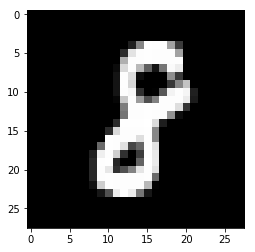

In [70]:
# 6. Get a random image
rnd_image_index = random.randrange(0, how_many_images-1)
random_image = x_train[rnd_image_index]
print('This image should be a(n) ' + str(y_train[rnd_image_index]))
plt.imshow(random_image, cmap="gray")

In [72]:
# 7. Predict
rnd_image = np.array([random_image])
predictions = model.predict(rnd_image)[0].tolist()
guess = predictions.index(max(predictions))
certainty = "{0:.2f}".format(predictions[guess]*100)
print('The image should be a ' + str(guess) + ' with a certainty of ' + certainty + '%')

The image should be a 8 with a certainty of 99.99%
